<a href="https://colab.research.google.com/github/chettkulkarni/deep_learning/blob/master/ungraded%204/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
%matplotlib inline
import numpy as np

In [23]:
c=[]
f=[]
for i in range(1,20):
  c.append(i)
  f.append(1.8*i + 32)
print(c)
print(f)
  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[33.8, 35.6, 37.4, 39.2, 41.0, 42.8, 44.6, 46.4, 48.2, 50.0, 51.8, 53.6, 55.400000000000006, 57.2, 59.0, 60.8, 62.6, 64.4, 66.2]


In [0]:
far = torch.tensor([33.8, 35.6, 37.4, 39.2, 41.0, 42.8, 44.6, 46.4, 48.2, 50.0, 51.8, 53.6, 55.400000000000006, 57.2, 59.0, 60.8, 62.6, 64.4, 66.2]) 
unknown = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

### Building a linear  model

In [0]:
#Defining a model
def my_model(unknown, w, b):
    return w * unknown + b

In [0]:
#Defining loss function
def compute_loss(pred, far):
  sq_diff = (pred - far)**2 
  return sq_diff.mean()

In [27]:
#Initializing the parameters and invoking model
w = torch.ones(1) 
b = torch.zeros(1)

pred = my_model(unknown, w, b) 
pred

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19.])

In [28]:
#Checking the value of loss
loss = compute_loss(pred, far) 
loss

tensor(1619.2000)

In [0]:
#Computing rate of change of loss
gradient = 0.1
rate_of_change_of_loss_w = (compute_loss(my_model(unknown, w + gradient, b), far) - compute_loss(my_model(unknown, w - gradient, b), far)) / (2.0 * gradient)

In [0]:
#Updating weights
lr = 1e-2
w = w - lr * rate_of_change_of_loss_w

rate_of_change_of_loss_b = (compute_loss(my_model(unknown, w + gradient, b), far) - compute_loss(my_model(unknown, w - gradient, b), far)) / (2.0 * gradient)
b = b - lr * rate_of_change_of_loss_b

In [0]:
#Computing derivative of loss function
def comput_grad_loss(pred, far):
  grad_diffs = 2 * (pred - far) 
  return grad_diffs

In [0]:
#Defining the model for w and b
def my_dmodel_dw(unknown, w, b):
    return unknown

In [0]:
def my_dmodel_db(unknown, w, b):
    return 1.0

In [0]:
#Defining gradient function by combining all above
def compute_grad(unknown, far, pred, w, b):
    dev_loss_dtp = comput_grad_loss(pred, far)
    dev_loss_dw = dev_loss_dtp * my_dmodel_dw(unknown, w, b)
    dev_loss_db = dev_loss_dtp * my_dmodel_db(unknown, w, b)
    return torch.stack([dev_loss_dw.sum(), dev_loss_db.sum()])

In [0]:
#Defining the training loop
def train_loop(no_of_epochs, lr, params, unknown, far):
    for epoch in range(1, no_of_epochs + 1):
        w, b = params

        #Forward pass
        pred = my_model(unknown, w, b)
        loss = compute_loss(pred, far)
        #Backward pass
        gradient = compute_grad(unknown, far, pred, w, b)
        params = params - lr * gradient
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [0]:
def train_loop(no_of_epochs, lr, params, unknown, far, print_params=True):
    for epoch in range(1, no_of_epochs + 1):
        w, b = params

        pred = my_model(unknown, w, b)
        loss = compute_loss(pred, far)
        gradient = compute_grad(unknown, far, pred, w, b)

        params = params - lr * gradient

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', gradient)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  
            
    return params

In [37]:
#Running training loop
train_loop(
    no_of_epochs = 100, 
    lr = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    unknown = unknown, 
    far = far)

Epoch 1, Loss 1619.199951
    Params: tensor([162.1200,  15.2000])
    Grad:   tensor([-16112.,  -1520.])
Epoch 2, Loss 3287739.500000
    Params: tensor([-7693.8472,  -587.6320])
    Grad:   tensor([785596.7500,  60283.1992])
Epoch 3, Loss 7794741248.000000
    Params: tensor([374825.7188,  28891.2832])
    Grad:   tensor([-38251956.0000,  -2947891.7500])
...
Epoch 10, Loss 3283304186273942697256254038867968.000000
    Params: tensor([-2.4327e+17, -1.8746e+16])
    Grad:   tensor([2.4826e+19, 1.9131e+18])
Epoch 11, Loss 7784684802296664400276204523771396096.000000
    Params: tensor([1.1845e+19, 9.1279e+17])
    Grad:   tensor([-1.2089e+21, -9.3153e+19])
...


tensor([-5.7678e+20, -4.4446e+19])

In [38]:
#Running training loop with different learning rates
train_loop(
    no_of_epochs = 100, 
    lr = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    unknown = unknown, 
    far = far)

Epoch 1, Loss 1619.199951
    Params: tensor([2.6112, 0.1520])
    Grad:   tensor([-16112.,  -1520.])
Epoch 2, Loss 583.139160
    Params: tensor([3.4207, 0.2422])
    Grad:   tensor([-8094.9121,  -901.9681])
Epoch 3, Loss 320.629456
    Params: tensor([3.8269, 0.3013])
    Grad:   tensor([-4061.7520,  -590.9340])
...
Epoch 10, Loss 229.012131
    Params: tensor([4.2220, 0.5256])
    Grad:   tensor([ -12.1329, -277.1824])
Epoch 11, Loss 228.608551
    Params: tensor([4.2216, 0.5532])
    Grad:   tensor([   4.3924, -275.6683])
...
Epoch 99, Loss 196.077225
    Params: tensor([4.0442, 2.8765])
    Grad:   tensor([  19.5803, -254.1074])
Epoch 100, Loss 195.735550
    Params: tensor([4.0423, 2.9019])
    Grad:   tensor([  19.5646, -253.8858])


tensor([4.0423, 2.9019])

In [0]:
#Normalizing unknown
unknownn = 0.1 * unknown

In [40]:
#Running training loop on Normalized unknown
train_loop(
    no_of_epochs = 200, 
    lr = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    unknown = unknownn, 
    far = far)

Epoch 1, Loss 2487.699951
    Params: tensor([21.5580, 18.6200])
    Grad:   tensor([-2055.8000, -1862.0000])
Epoch 2, Loss 100.269501
    Params: tensor([24.8847, 22.3524])
    Grad:   tensor([-332.6747, -373.2360])
Epoch 3, Loss 21.853508
    Params: tensor([25.1498, 23.4023])
    Grad:   tensor([ -26.5038, -104.9900])
...
Epoch 10, Loss 9.055923
    Params: tensor([22.9927, 26.2025])
    Grad:   tensor([ 27.8021, -32.2841])
Epoch 11, Loss 8.125742
    Params: tensor([22.7293, 26.5084])
    Grad:   tensor([ 26.3358, -30.5809])
...
Epoch 99, Loss 0.000586
    Params: tensor([18.0402, 31.9534])
    Grad:   tensor([ 0.2236, -0.2597])
Epoch 100, Loss 0.000526
    Params: tensor([18.0380, 31.9558])
    Grad:   tensor([ 0.2118, -0.2460])
...


tensor([18.0002, 31.9998])

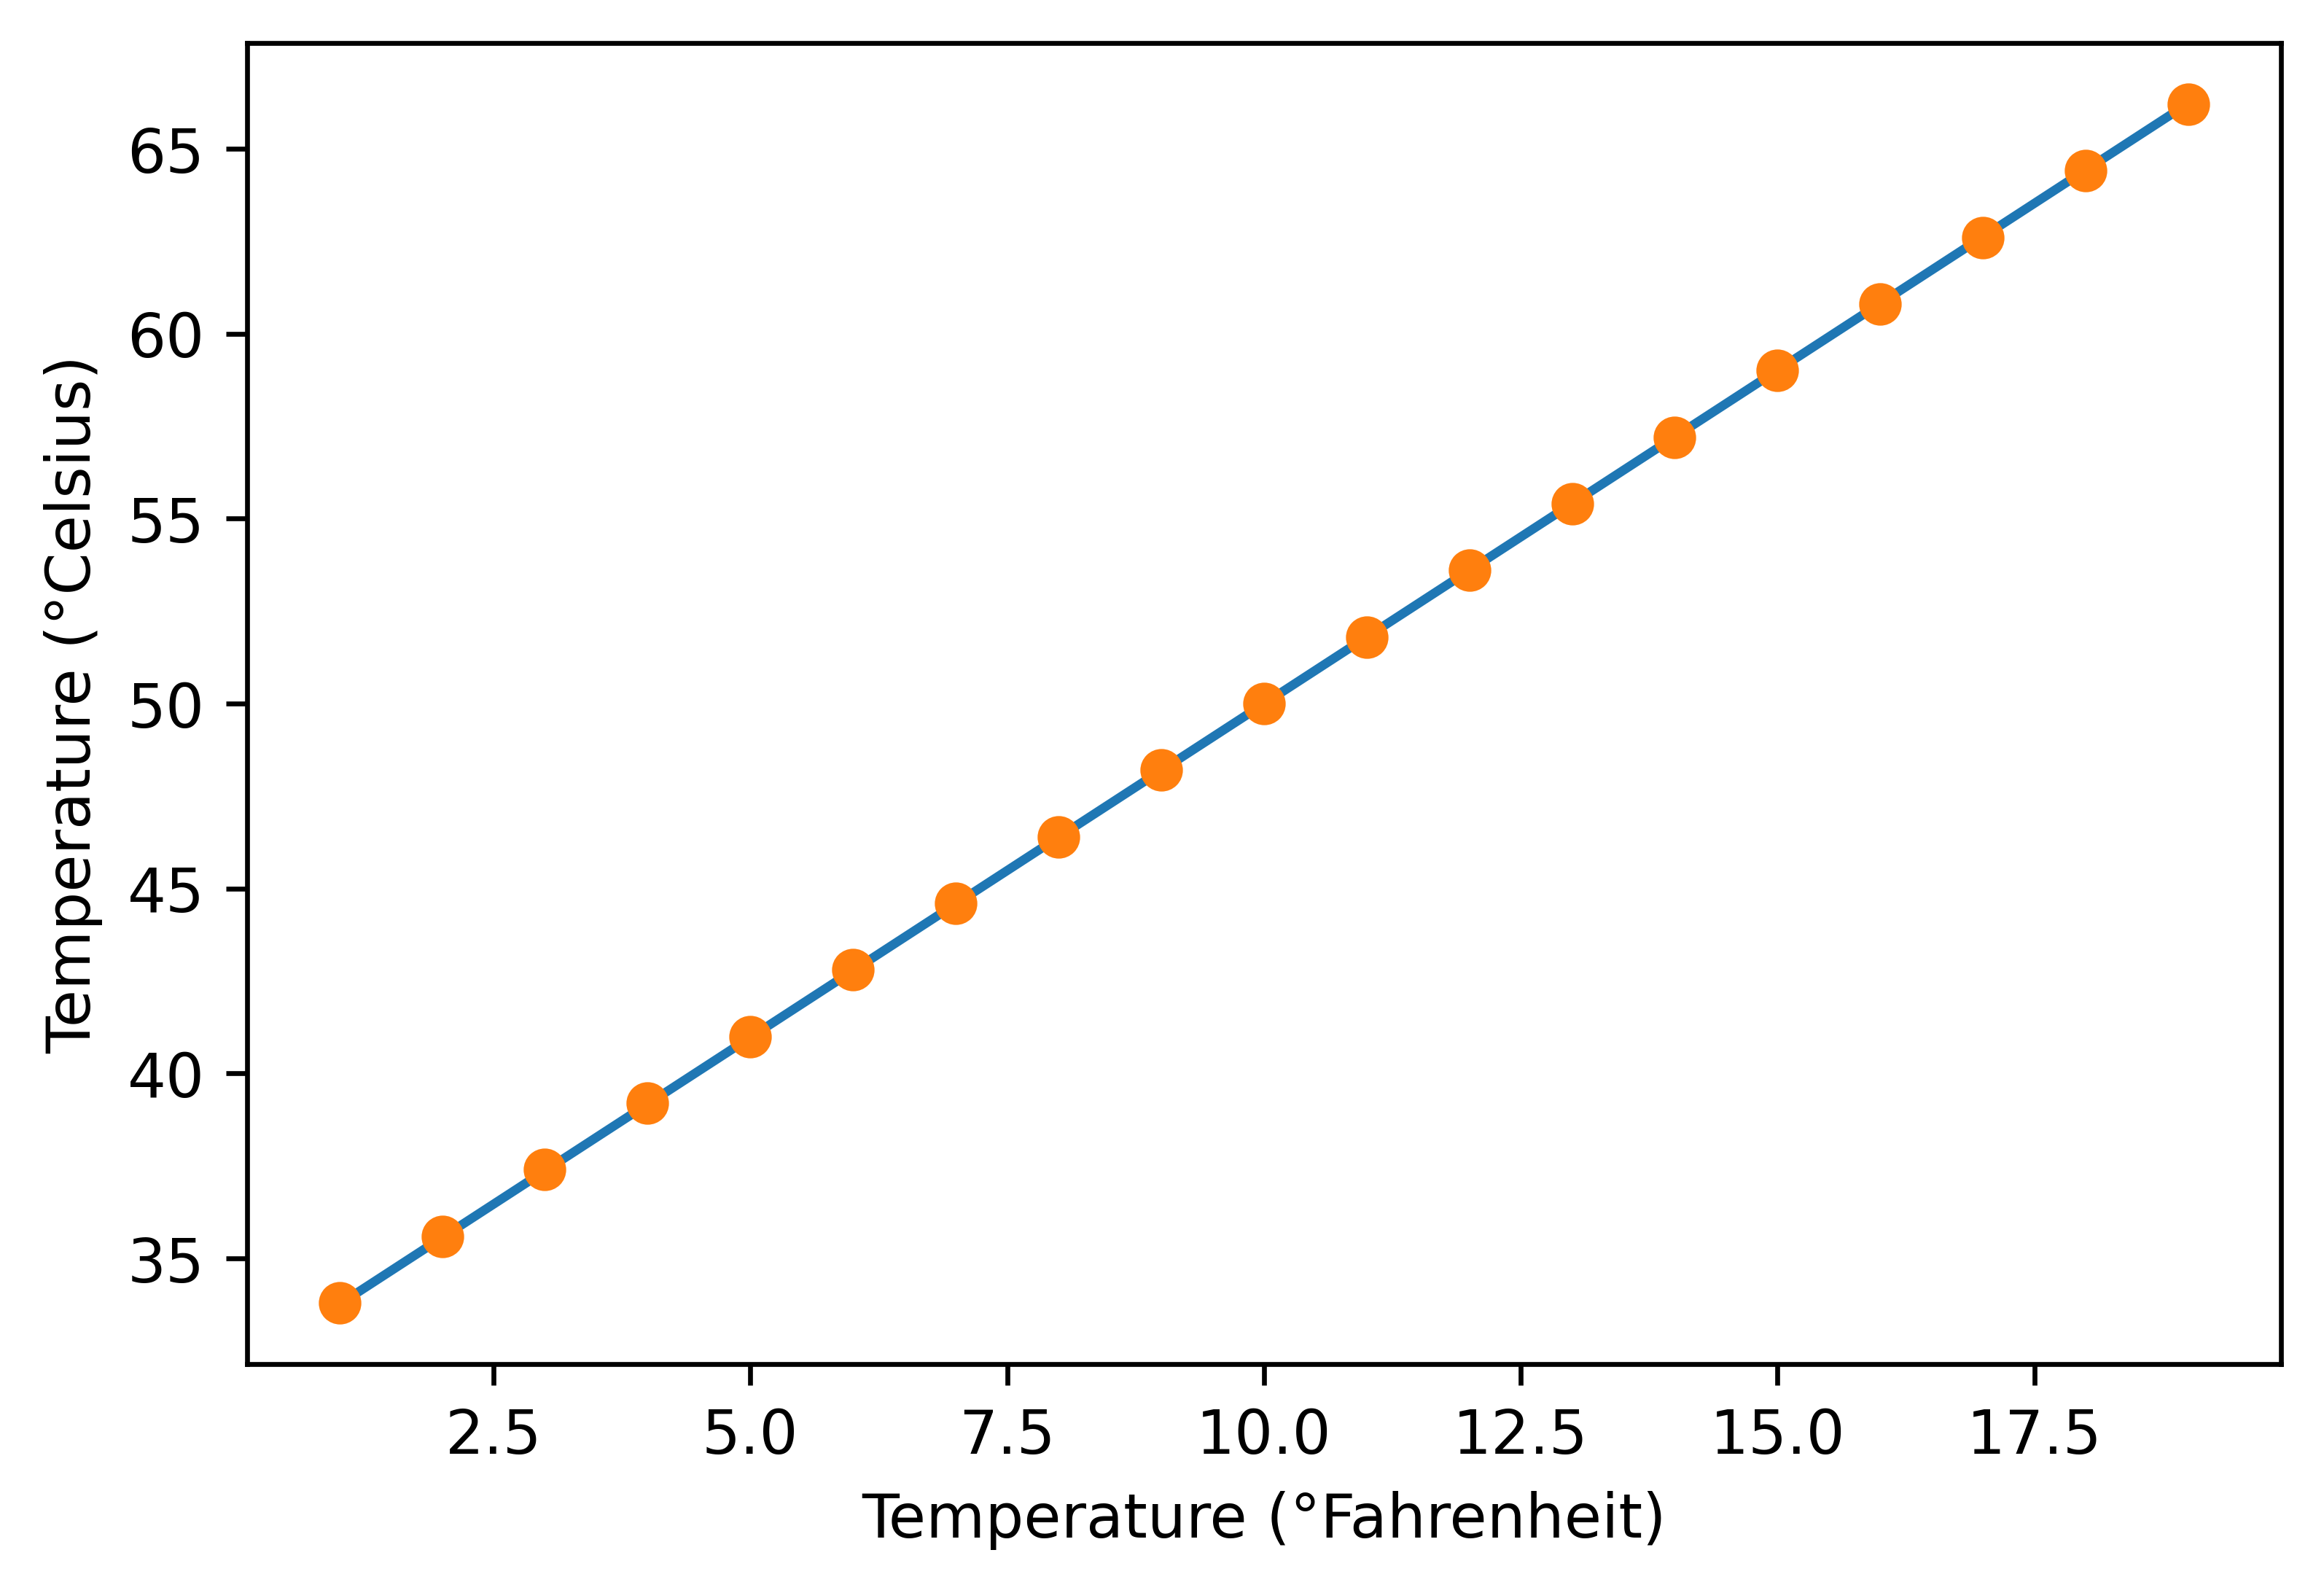

In [41]:
#Plotting the linear-fit model (solid line) versus input data (circles)
%matplotlib inline
from matplotlib import pyplot as plt

pred = my_model(unknownn, *params)  

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(unknown.numpy(), pred.detach().numpy()) 
plt.plot(unknown.numpy(), far.numpy(), 'o')